In [56]:
import numpy as np, pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [57]:
ngc = pd.read_csv("galaxies.csv", index_col=False)

In [58]:
ngc.head()

,name,ra,dec,z,+/-
0,NGC 0001,1.816000,27.708083,0.015177,0.000002
1,NGC 0002,1.821292,27.678361,0.025174,0.000007
2,NGC 0003,1.820000,8.301639,0.013009,0.000163
3,NGC 0004,1.851708,8.373778,NaN,NaN
4,NGC 0005,1.953633,35.362304,0.017048,0.000137


In [59]:
ngc.isna().mean()

name    0.000000
ra      0.000000
dec     0.000000
z       0.007684
+/-     0.014020
dtype: float64

In [60]:
ngc.dropna(inplace=True)

In [61]:
ngc["ra"] /= (180/np.pi) # convert right ascension into radians

In [62]:
ngc["dec"] = -1 * ngc["dec"] / (180/np.pi) + (np.pi/2) # convert declination into radians, shift it from [-pi/2 : pi/2] to [0 : pi] and flip it

In [63]:
ngc.describe() # make sure that the new values look right

,ra,dec,z,+/-
count,7314.000000,7314.000000,7314.000000,7.314000e+03
mean,3.097860,1.386717,0.015976,6.112737e-05
std,1.583475,0.562687,0.010331,6.365685e-05
min,0.001933,0.015829,-0.001001,1.000000e-06
25%,2.329020,0.986591,0.007800,1.700000e-05
50%,3.352023,1.370916,0.014715,3.700000e-05
75%,3.841624,1.751643,0.022420,9.300000e-05
max,6.281463,3.129978,0.115660,1.490000e-03


In [64]:
# set up constants
c = 299792 # speed of light (km/s)
H_0 = 70.0 # Hubble parameter(km/s)

In [65]:
# create empty columns for cartesian coordinates
ngc["x1"] = 0
ngc["x2"] = 0
ngc["x3"] = 0

In [66]:
ngc["rho"] = c / H_0 * ngc["z"] # radial distance calculated from redshift

In [67]:
ngc["x1"] = ngc["rho"] * np.cos(ngc["ra"]) * np.sin(ngc["dec"]) # conversion from spherical to cartesian coords

In [68]:
ngc["x2"] = ngc["rho"] * np.sin(ngc["ra"]) * np.sin(ngc["dec"])

In [69]:
ngc["x3"] = ngc["rho"] * np.cos(ngc["dec"])

In [70]:
ngc.describe() # see if the mins and maxes look right for the new coordinates

,ra,dec,z,+/-,x1,x2,x3,rho
count,7314.000000,7314.000000,7314.000000,7.314000e+03,7314.000000,7314.000000,7314.000000,7314.000000
mean,3.097860,1.386717,0.015976,6.112737e-05,-11.514165,-4.827247,13.941394,68.421203
std,1.583475,0.562687,0.010331,6.365685e-05,57.119309,39.029989,38.775720,44.245898
min,0.001933,0.015829,-0.001001,1.000000e-06,-351.364256,-207.574607,-215.657482,-4.287026
25%,2.329020,0.986591,0.007800,1.700000e-05,-45.705702,-23.666787,-8.163350,33.404323
50%,3.352023,1.370916,0.014715,3.700000e-05,-15.201919,-3.774292,7.825842,63.020561
75%,3.841624,1.751643,0.022420,9.300000e-05,18.512558,14.765266,34.437939,96.021235
max,6.281463,3.129978,0.115660,1.490000e-03,313.262957,358.972521,246.123237,495.342026


In [71]:
X = ngc[["x1", "x2", "x3"]] # features for clustering

In [72]:
db = DBSCAN()

In [73]:
db.fit(X);

In [74]:
len(set(db.labels_)) # 20 clusters + noise

20

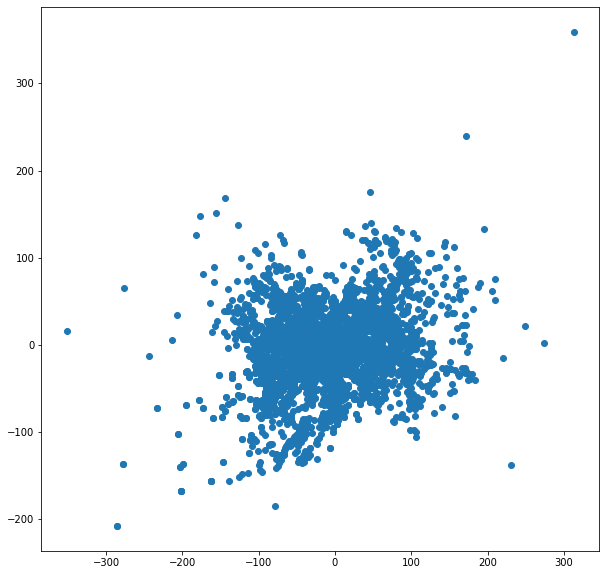

In [75]:
plt.figure(figsize=(10,10))
plt.scatter(ngc["x1"], ngc["x2"]); # plotting only the galaxies' x1 and x2 coordinates (view from above)

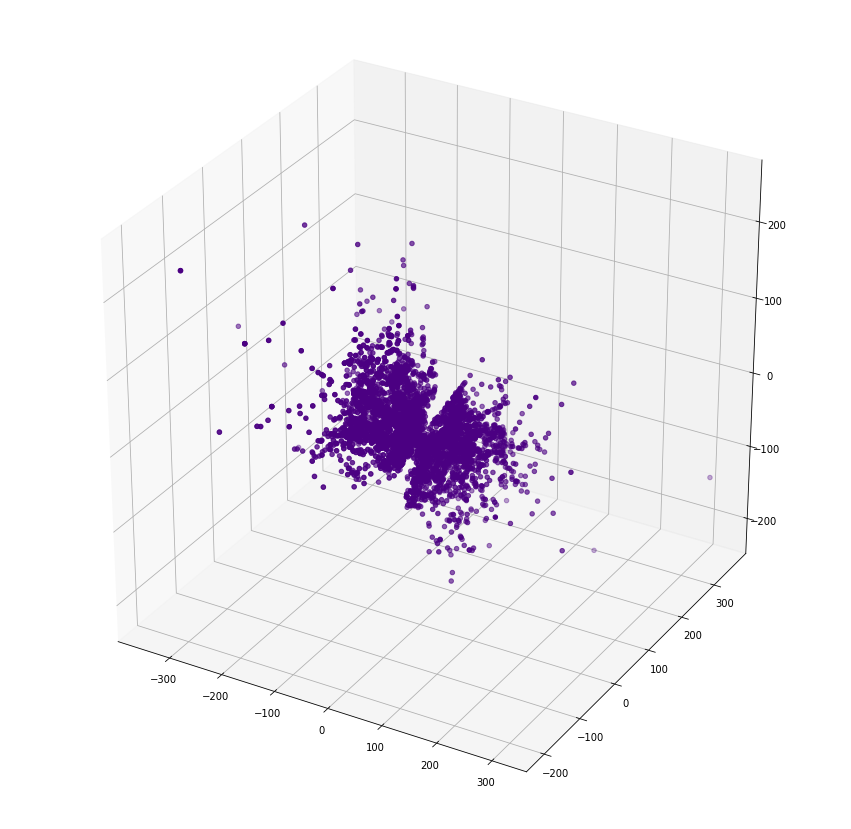

In [77]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(ngc["x1"], ngc["x2"], ngc["x3"], c='indigo', marker='o'); # plot of galaxies in 3D space

The ant shape isn't good. It is related to the black void I saw in the scatterplot of right ascension vs. declination. I didn't think it would be such a big problem then. This is why I am still thinking about switching to a different data set. The problem is that I don't know of any other catalogue of galaxies that covers such a large portion of the sky. Therefore, the options are either to continue with the NGC galaxies even though there is a big hole in the data, or switch to looking only at galaxies in a small patch of sky, like the [Shapley Supercluster](./shapley.dat), which has already been [extensively mapped](https://arxiv.org/pdf/astro-ph/0402362.pdf). I don't mind comparing my results to those of professional astronomers, but given that I don't completely understand their results, this seems like a monumental task.